In [1]:
import os, sys
import h5py
import numpy as np 
import torch 
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from skimage import io
import config
import utils
import yaml
from pytorch_lightning.callbacks import ModelCheckpoint
from train.models import UNet3D


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
from train.datasets import TomoDataset

In [9]:
path = '/sdf/home/s/skivelso/sanket/vax/data/train_tomos/pfizer/20210816_CS67_tomo0_01_stack__bin4_postproc.hdf'
with h5py.File(path, 'r+') as fh:
    # this is the input volume
    data = fh["data"][()].astype(np.float32)

BlockingIOError: [Errno 11] Unable to open file (unable to lock file, errno = 11, error message = 'Resource temporarily unavailable')

In [4]:
test_dataset = TomoDataset(os.path.join(config.TRAIN_TOMO_DIR, 'pfizer'))

In [7]:
test_dataset.data_list[0]

('/sdf/home/s/skivelso/sanket/vax/data/train_tomos/pfizer',
 '20210816_CS67_tomo0_01_stack__bin4_postproc.hdf')

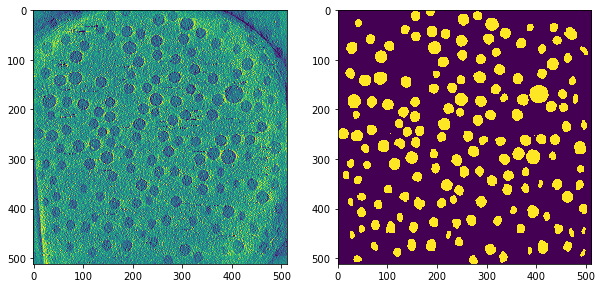

In [2]:
n = '04'
s = 230
path = os.path.join(config.TRAIN_TOMO_DIR, 'pfizer', f'20210816_CS67_tomo0_{n}_stack__bin4_postproc.hdf')
utils.inspect_label(path, s)

In [5]:
n = '01'
path = os.path.join(config.TRAIN_TOMO_DIR, 'pfizer', f'20210816_CS67_tomo0_{n}_stack__bin4_postproc.hdf')
with h5py.File(path, 'r') as fh:
    data = fh['data'][()]
    labels = fh['labels'][()]

In [7]:
print(np.unique(labels))

[-3.        -2.9999995 -2.9999976 ...  2.9999905  2.9999957  3.       ] [-1  0  1]


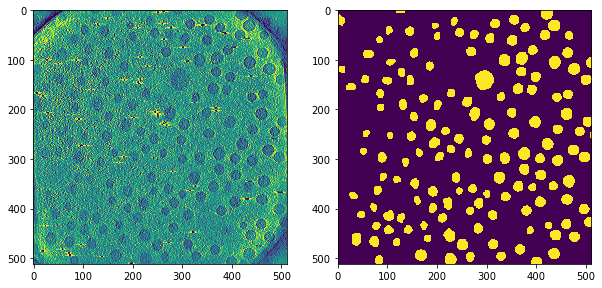

In [8]:
s=225
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
ax1.imshow(data[s], interpolation='nearest')
ax2.imshow(labels[s], interpolation='nearest')

In [25]:
p = '/sdf/home/s/skivelso/sanket/vax/data/raw/pfizer/20210816_CS67_tomo0_01_stack__bin4_preproc.hdf'
with h5py.File(p, 'r') as fh:
    print(fh.keys())
    data = fh['MDF']['images']['0']['image'][()]
    print(data.shape)
    data = pool(torch.tensor(data)).numpy()

<KeysViewHDF5 ['MDF']>
(400, 1024, 1024)


In [8]:
pool = torch.nn.AvgPool2d(2, stride=2)

In [22]:
#data_2 = pool(torch.tensor(data))
data_2.dtype

torch.float32

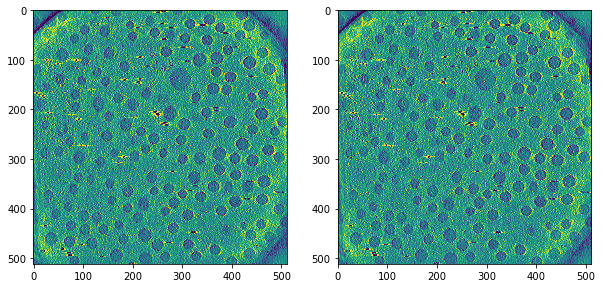

In [26]:
s=230
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
ax1.imshow(data[s], interpolation='nearest')
ax2.imshow(data_2[s], interpolation='nearest')

In [49]:
ps = '/sdf/home/s/skivelso/sanket/vax/data/for_processing/vax_masks/pfizer/20210816_CS67_tomo0_01_stack__bin4_222.png'

In [55]:
ps = '/sdf/home/s/skivelso/sanket/vax/data/for_processing/vax_masks/pfizer/._20210816_CS67_tomo0_04_stack__bin4_205.png'
img = mpimg.imread(ps)
print(type(img), img.dtype)
imgplot = plt.imshow(img)
plt.show()

SyntaxError: not a PNG file (<string>)

In [45]:
from PIL import Image

In [46]:
image = Image.open(ps)

In [48]:
np.asarray(image)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

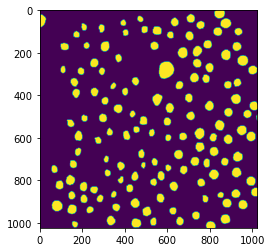

In [52]:
m_pool = torch.nn.MaxPool2d(2, stride=2)
imgplot = plt.imshow(label)
plt.show()